**CO2 Emissions Prediction**

**Tondupalli Bhavana - AP19110010482**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33.0,196.0
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29.0,221.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48.0,136.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25.0,255.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27.0,244.0


**Data Description**

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7270.000000,7302.000000,7284.000000,7278.000000,7145.000000
mean,3.160068,5.615030,12.551926,9.040386,10.968479,27.502748,250.555633
std,1.354170,1.828307,3.508690,2.224429,2.889250,7.230604,58.637658
min,0.900000,3.000000,1.000000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


**Data Columns Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7379 non-null   object 
 7   Fuel Consumption City (L/100 km)  7270 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7302 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7284 non-null   float64
 10  Fuel Consumption Comb (mpg)       7278 non-null   float64
 11  CO2 Emissions(g/km)               7145 non-null   float64
dtypes: flo

**Identifying Missing Values**

In [ ]:
df.isnull().sum() 

Make                                  0
Model                                 0
Vehicle Class                         0
Engine Size(L)                        0
Cylinders                             0
Transmission                          0
Fuel Type                             6
Fuel Consumption City (L/100 km)    115
Fuel Consumption Hwy (L/100 km)      83
Fuel Consumption Comb (L/100 km)    101
Fuel Consumption Comb (mpg)         107
CO2 Emissions(g/km)                 240
dtype: int64

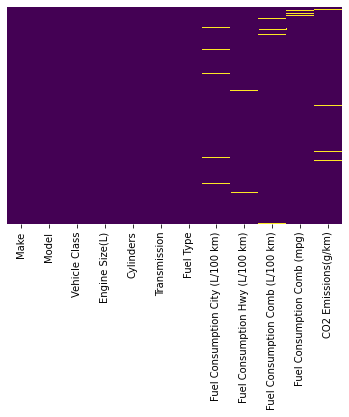

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
df['Fuel Type'].fillna(df['Fuel Type'].mode().iloc[0], inplace = True)
print(f"No. of Null Values: {df['Fuel Type'].isnull().sum()}")
print(f"Fuel Type is filled with the repeated value {df['Fuel Type'].mode().iloc[0]}")

No. of Null Values: 0
Fuel Type is filled with the repeated value X


In [ ]:
x = df['Fuel Consumption City (L/100 km)'].mean()
print(f"Mean: {round(x, 2)}")
df['Fuel Consumption City (L/100 km)'].fillna(round(x,2),inplace=True)
print(f"No. of Null Values: {df['Fuel Consumption City (L/100 km)'].isnull().sum()}")

if (round(x,2) in df['Fuel Consumption City (L/100 km)'].unique()):
  print(f"Fuel Consumption City (L/100 km) is filled with mean {round(x, 2)}")

Mean: 12.55
No. of Null Values: 0
Fuel Consumption City (L/100 km) is filled with mean 12.55


In [ ]:
df['Fuel Consumption Hwy (L/100 km)'].bfill(inplace=True)

print(f"No. of Null Values: {df['Fuel Consumption Hwy (L/100 km)'].isnull().sum()}")

No. of Null Values: 0


In [ ]:
df['Fuel Consumption Comb (L/100 km)'].ffill(inplace = True)

print(f"No. of Null Values: {df['Fuel Consumption Comb (L/100 km)'].isnull().sum()}")

No. of Null Values: 0


In [ ]:
df['Fuel Consumption Comb (mpg)'].interpolate(inplace = True)

print(f"No. of Null Values: {df['Fuel Consumption Comb (mpg)'].isnull().sum()}")

No. of Null Values: 0


In [ ]:
x = df['CO2 Emissions(g/km)'].median()
print(f"Median: {round(x, 2)}")
df['CO2 Emissions(g/km)'].fillna(round(x,2),inplace=True)
print(f"No. of Null Values: {df['CO2 Emissions(g/km)'].isnull().sum()}")

if (x in df['CO2 Emissions(g/km)'].unique()):
  print(f"CO2 Emissions(g/km) is filled with meadian {x}")

Median: 246.0
No. of Null Values: 0
CO2 Emissions(g/km) is filled with meadian 246.0


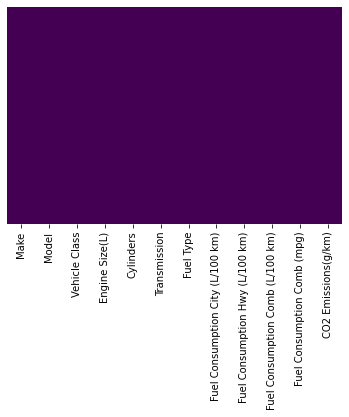

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

**Identifying Noisy Data**

minimum value: 1.0
maximum value: 30.6
bin edges: [ 1.   8.4 15.8 23.2 30.6]


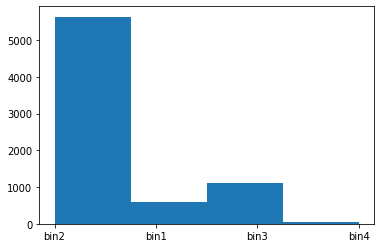

In [ ]:
#binning by distance 
min_value = df['Fuel Consumption City (L/100 km)'].min()
max_value = df['Fuel Consumption City (L/100 km)'].max()
print(f'minimum value: {min_value}')
print(f'maximum value: {max_value}')
bins = np.linspace(min_value,max_value,5)
print(f'bin edges: {bins}')
labels = ['bin1', 'bin2', 'bin3','bin4']
df['bins'] = pd.cut(df['Fuel Consumption City (L/100 km)'], bins=bins, labels=labels, include_lowest=True)
plt.hist(df['bins'], bins=4)
plt.show()


In [ ]:
#binning by mean

noisy=df['Fuel Consumption Hwy (L/100 km)']
min_value = df['Fuel Consumption Hwy (L/100 km)'].min()
max_value = df['Fuel Consumption Hwy (L/100 km)'].max()
print(f'minimum value: {min_value}')
print(f'maximum value: {max_value}')
np.sort(noisy) #sorting the array


minimum value: 4.0
maximum value: 20.6


array([ 4. ,  4. ,  4. , ..., 20.5, 20.6, 20.6])

In [ ]:
bin1=np.zeros((1477,5))
for i in range(0,7385,5):
 y=int(i/5) 
 mean=(noisy[i]+noisy[i+1]+noisy[i+2]+noisy[i+3]+noisy[i+4])/5
 for j in range(5): 
   bin1[y,j]=mean 
print(bin1)


[[7.6  7.6  7.6  7.6  7.6 ]
 [8.46 8.46 8.46 8.46 8.46]
 [9.44 9.44 9.44 9.44 9.44]
 ...
 [7.64 7.64 7.64 7.64 7.64]
 [7.5  7.5  7.5  7.5  7.5 ]
 [8.32 8.32 8.32 8.32 8.32]]


In [ ]:
noisy1=df['Fuel Consumption Comb (L/100 km)']
min_value = df['Fuel Consumption Comb (L/100 km)'].min()
max_value = df['Fuel Consumption Comb (L/100 km)'].max()
print(f'minimum value: {min_value}')
print(f'maximum value: {max_value}')
np.sort(noisy1) #sorting the array

minimum value: 4.1
maximum value: 26.1


array([ 4.1,  4.1,  4.1, ..., 25.9, 26.1, 26.1])

In [ ]:
#binning by median
bin2=np.zeros((1477,5))
for i in range(0,7385,5):
 y=int(i/5)
 for j in range(5): 
  bin2[y,j]=noisy1[i+1]
print(bin2)

[[ 9.6  9.6  9.6  9.6  9.6]
 [10.1 10.1 10.1 10.1 10.1]
 [ 9.8  9.8  9.8  9.8  9.8]
 ...
 [ 9.4  9.4  9.4  9.4  9.4]
 [ 8.9  8.9  8.9  8.9  8.9]
 [ 9.9  9.9  9.9  9.9  9.9]]


In [ ]:
#binning by boundary 
noisy3=df['CO2 Emissions(g/km)']
np.sort(noisy3) 
bin3=np.zeros((1477,5))
for i in range(0,7385,5):
 x=int(i/5)
 for j in range(5): 
   if(noisy3[i+j]-noisy3[i])<(noisy3[i+4]-noisy3[i+j]):
    bin3[x,j]=noisy3[i]
   else:
    bin3[x,j]=noisy3[i+4]
print(bin3)

[[196. 244. 196. 244. 244.]
 [212. 212. 212. 212. 230.]
 [225. 225. 225. 359. 359.]
 ...
 [205. 246. 246. 205. 246.]
 [210. 223. 210. 210. 223.]
 [219. 219. 248. 219. 248.]]


**Data Transformation**

In [ ]:
#min-max normalisation

df['Engine Size(L)'] = (df['Engine Size(L)'] - df['Engine Size(L)'].min()) / (df['Engine Size(L)'].max() - df['Engine Size(L)'].min())
df['Cylinders'] = (df['Cylinders'] - df['Cylinders'].min()) / (df['Cylinders'].max() - df['Cylinders'].min())
df['Fuel Consumption Comb (mpg)'] = (df['Fuel Consumption Comb (mpg)'] - df['Fuel Consumption Comb (mpg)'].min()) / (df['Fuel Consumption Comb (mpg)'].max() - df['Fuel Consumption Comb (mpg)'].min())


In [ ]:
#z-score normalisation

df['Fuel Consumption City (L/100 km)'] = (df['Fuel Consumption City (L/100 km)'] - df['Fuel Consumption City (L/100 km)'].mean()) / df['Fuel Consumption City (L/100 km)'].std()
df['Fuel Consumption Hwy (L/100 km)'] = (df['Fuel Consumption Hwy (L/100 km)'] - df['Fuel Consumption Hwy (L/100 km)'].mean()) / df['Fuel Consumption Hwy (L/100 km)'].std()
df['Fuel Consumption Comb (L/100 km)'] = (df['Fuel Consumption Comb (L/100 km)'] - df['Fuel Consumption Comb (L/100 km)'].mean()) / df['Fuel Consumption Comb (L/100 km)'].std()

In [ ]:
#decimal scaling

import math

max1 = 0
for i in df['CO2 Emissions(g/km)']:
  max1 = max(max1, abs(i))
j = len(str(math.ceil(max1)))

df['CO2 Emissions(g/km)'] = df['CO2 Emissions(g/km)'] / 10 ** j
print(df['CO2 Emissions(g/km)'][:5])

0    0.196
1    0.221
2    0.136
3    0.255
4    0.244
Name: CO2 Emissions(g/km), dtype: float64


**Histograms**

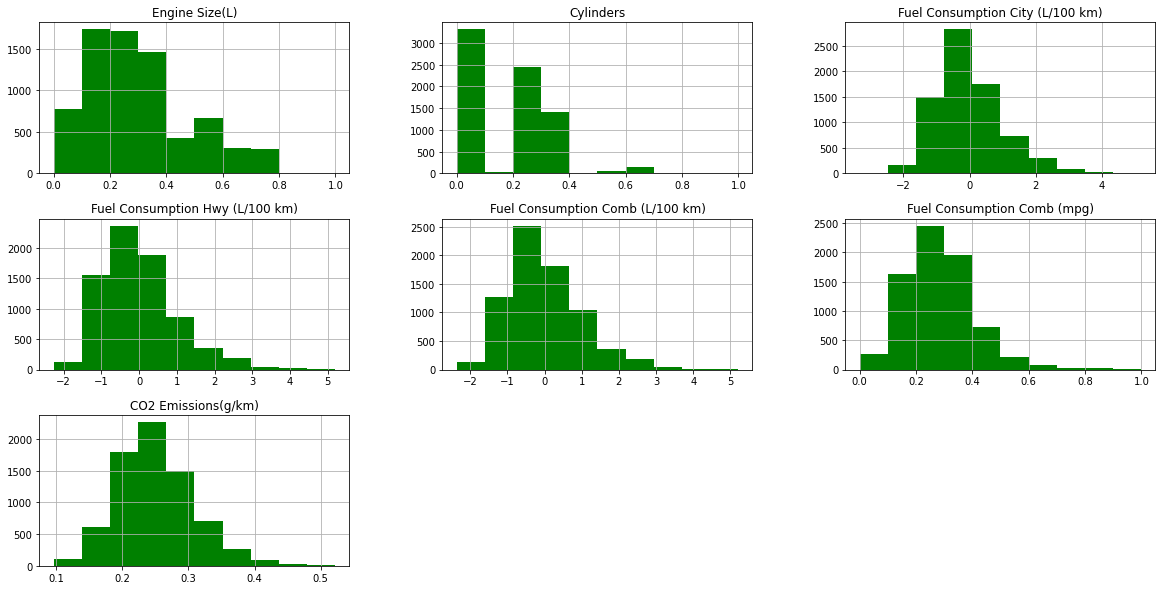

In [ ]:
ls = df.select_dtypes(include = ['int64','float'])
ls.hist(figsize = (20,10), color='green')
plt.show()

**Data Selection Using Principal Component Analysis**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pct=pca.fit_transform(df.iloc[:,7:-2])
principal_df = pd.DataFrame (pct,columns=['pc1', 'pc2'])
finaldf=pd.concat([principal_df,df[['CO2 Emissions(g/km)']]],axis=1)

In [ ]:
finaldf.head(10)

,pc1,pc2,CO2 Emissions(g/km)
0,-1.543277,-0.213312,0.196
1,-0.845879,-0.155735,0.221
2,-2.957296,0.304350,0.136
3,0.067801,-0.012778,0.255
4,-0.236847,-0.018682,0.244
5,-0.649030,-0.300081,0.230
6,-0.416859,-0.290914,0.232
7,0.187422,0.103683,0.255
8,0.287611,-0.009582,0.267
9,-0.757059,-0.463054,0.212


In [ ]:
pca=PCA(n_components=2) 
principalcomponents=pca.fit_transform(df.iloc[:,7:-2])

principal_Df1=pd.DataFrame(data=principalcomponents
                          ,columns=['principal component 1', 'principal component 2'])

final_Df1=pd.concat([principal_Df1, df[['CO2 Emissions(g/km)']]], axis=1)
final_Df1.tail(5)

,principal component 1,principal component 2,CO2 Emissions(g/km)
7380,-0.664273,-0.402263,0.219
7381,-0.631090,0.037871,0.232
7382,-0.388766,0.031814,0.240
7383,-0.631090,0.037871,0.232
7384,-0.144831,-0.104880,0.248


**Correlation Matrix**

In [ ]:
final_Df1.corr()

,principal component 1,principal component 2,CO2 Emissions(g/km)
principal component 1,1.000000e+00,1.748411e-17,0.901892
principal component 2,1.748411e-17,1.000000e+00,-0.076511
CO2 Emissions(g/km),9.018925e-01,-7.651090e-02,1.000000


**Linear Regression**

**Independent Variable : Principle Component 1**

**Dependent Variable : CO2 Emissions(g/km)**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = final_Df1.drop(['CO2 Emissions(g/km)', 'principal component 2'],axis=1).values
y = final_Df1['CO2 Emissions(g/km)'].values	

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept : {model.intercept_}")
print(f"Coefficient : {model.coef_}")

Intercept : 0.2505023098670213
Coefficient : [0.03035731]


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.tail()

,Actual,Predicted
2211,0.255,0.224304
2212,0.290,0.276709
2213,0.242,0.239528
2214,0.190,0.201239
2215,0.214,0.217529


In [ ]:
d = float(input("Enter the value of the independent variable : "))
m = model.predict([[d]])
print(f"The predicted value is : {m}")

Enter the value of the independent variable : 0.214
The predicted value is : [0.25699877]


**Linear Regression Graph**

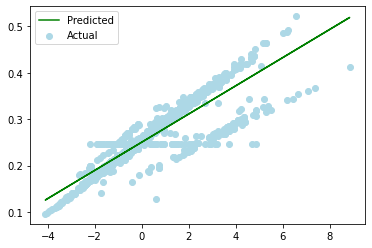

In [ ]:
plt.scatter(X_test, y_test, color = "lightblue", label="Actual")
plt.plot(X_test, y_pred, color = "green", label="Predicted")
plt.legend()
plt.show()

**Accuracy and Error Values**

In [ ]:

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred), 2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred), 2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
print('R-squared Error:', round(metrics.r2_score(y_test, y_pred), 2))

Mean Absolute Error: 0.02
Mean Squared Error: 0.0
Root Mean Squared Error: 0.02
R-squared Error: 0.81
